In [28]:
from cntools.datasets import Dataset
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import pearsonr,spearmanr
from sklearn.cross_decomposition import CCA
import networkx as nx
import seaborn as sns
import pickle
import matplotlib as mpl
import sys
sys.path.insert(0, '..')

In [29]:
patient_col = 'Sample'
image_col = 'Image'
neigh_col = 'CN'
ct_col = 'CT'

In [30]:
# CRC:

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# cells = ['CD8+ICOS+', 'CD8+Ki67+', 'CD8+PD-1+', 'Treg-Ki67+']
# df[ct_col] = [cells[i] for i in np.argmax(df[cells].to_numpy(), axis=1)]
# chks = cells  # select which neighborhoods and functional subsets

# Uncomment one of these results on CRC

# nbs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# cns = pickle.load(open('../cn/CRC/CF-IDF/cns_n_cns=9_eps=32.0_r=0.8_max_neighbors=-1_exclude_cts=[]_seed=0_Naive_3.pkl', 'rb'))
# ind = ['CN-1: Macrophage enriched', 'CN-2: Macrophage & mixed cell enriched', 'CN-3: Smooth muscle', 'CN-4: Granulocyte enriched', 'CN-5: T cell enriched', 'CN-6: Undefined cell enriched', 'CN-7: Immune cell / vasculature enriched', 'CN-8: Immune-infiltrated stroma', 'CN-9: Bulk tumor']

# nbs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# cns = pickle.load(open('../cn/CRC/CNE/cns_n_cns=9_perp=15_lam=0.25_naive.pkl', 'rb'))
# ind = ['CN-1: Vasculature & stroma', 'CN-2: Macrophage enriched', 'CN-3: Smooth muscle', 'CN-4: Bulk tumor', 'CN-5: Granulocyte enriched', 'CN-6: Immune cell enriched', 'CN-7: Plasma cell enriched', 'CN-8: T cell enriched', 'CN-9: Follicle']

# nbs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# cns = pickle.load(open('../cn/CRC/Spatial LDA/cns_n_cns=9_eps=50.0_b=0.025_train_size_fraction=0.99_n_processes=8_Naive_3.pkl', 'rb'))
# ind = ['CN-1: Granulocyte enriched', 'CN-2: Immune-infiltrated stroma & tumor boundary', 'CN-3: Follicle', 'CN-4: T cell enriched', 'CN-5: Smooth muscle', 'CN-6: Vasculature, macrophage & plasma enriched', 'CN-7: Undefined cell enriched', 'CN-8: Macrophage & T cell enriched', 'CN-9: Bulk tumor']


# T2D:

ds = pickle.load(open('../data/T2D/T2D_ds.pkl', 'rb'))
df = pd.read_csv('../data/T2D/T2D_df.csv')
cells = ds.ct_order
df_cells = np.zeros((len(df), len(cells)), dtype='int')
df_cells[[i for i in range(len(df))], [cells.index(i) for i in df[ct_col]]] = 1
df[cells] = df_cells
chks = ['Endothelial cells', 'Pericytes'] # select which neighborhoods and functional subsets (vascular)
# chks = ['T cells', 'Macrophages', 'Other immune cells'] # select which neighborhoods and functional subsets (immune)

# Uncomment one of these results on T2D

# nbs = [0, 1, 2, 3, 4, 5]
# cns = pickle.load(open('../cn/T2D/CC/cns_n_cns=6_m=5_exclude_cts=[]_seed=0_HMRF_45.0_9.0.pkl', 'rb'))
# ind = ['CN-1: Beta cell enriched', 'CN-2: Alpha & beta cell enriched', 'CN-3: Alpha cell enriched', 'CN-4: Endothelial cell enriched', 'CN-5: Alpha & mixed cell enriched', 'CN-6: Delta, gamma & macrophage cell enriched']

nbs = [0, 1, 2, 3, 4, 5]
cns = pickle.load(open('../cn/T2D/CNE/cns_n_cns=6_perp=15_lam=0.25_naive.pkl', 'rb'))
ind = ['CN-1: Delta cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Gamma cell enriched', 'CN-4: Endothelial cell enriched', 'CN-5: Alpha cell enriched', 'CN-6: Macrophage enriched']

# nbs = [0, 1, 2, 3, 4, 5]
# cns = pickle.load(open('../cn/T2D/Spatial LDA/cns_n_cns=6_eps=100.0_b=0.25_train_size_fraction=0.989_n_processes=8_Naive_3.pkl', 'rb'))
# ind = ['CN-1: Endothelial cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Alpha cell enriched', 'CN-4: Gamma cell enriched', 'CN-5: Delta cell enriched', 'CN-6: Alpha, macrophage & endothelial cell enriched']


# ind = [i.split(':')[0] for i in ind]

In [31]:
df[neigh_col] = 0
for sample, df_sample in df.groupby(patient_col, sort=False):
    for image, df_image in df_sample.groupby(image_col, sort=False):
        df.loc[df_image.index, neigh_col] = cns[sample][image]
cells2 = pd.DataFrame(df, columns=cells + [ct_col, neigh_col, patient_col])
cells2

,Alpha cells,Delta cells,Beta cells,Gamma cells,Epsilon cells,T cells,Macrophages,Other immune cells,Endothelial cells,Pericytes,CT,CN,Sample
0,1,0,0,0,0,0,0,0,0,0,Alpha cells,1,ABI2259
1,0,0,1,0,0,0,0,0,0,0,Beta cells,1,ABI2259
2,1,0,0,0,0,0,0,0,0,0,Alpha cells,1,ABI2259
3,1,0,0,0,0,0,0,0,0,0,Alpha cells,1,ABI2259
4,0,0,1,0,0,0,0,0,0,0,Beta cells,1,ABI2259
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66318,0,0,0,1,0,0,0,0,0,0,Gamma cells,2,AFCM451
66319,0,0,0,0,0,0,0,0,1,0,Endothelial cells,2,AFCM451
66320,0,0,0,1,0,0,0,0,0,0,Gamma cells,2,AFCM451
66321,0,0,0,1,0,0,0,0,0,0,Gamma cells,2,AFCM451


In [32]:
group_patients = ds.group2sample
groups = list(group_patients.keys())
good_patients = []
for samples in ds.group2sample.values():
    good_patients += samples

In [33]:
all_freqs = cells2.groupby([patient_col, neigh_col]).apply(lambda x: x[ct_col].value_counts()).unstack().reset_index()

In [34]:
#work out neighborhood counts
nbd_counts = cells2.groupby([patient_col, neigh_col]).size().unstack().fillna(0).loc[good_patients]
pat_counts = cells2.groupby([patient_col]).size().fillna(0).loc[good_patients]

In [35]:
# make a df of neighborhood specific cell type densities
x = all_freqs.reset_index().iloc[:,1:]
for patient in good_patients:
    for i in range(len(nbs)):
        if len(x[(x[patient_col] == patient) & (x[neigh_col] == i)]) == 0:
            x = x.append({patient_col: patient, neigh_col: i}, ignore_index=True)

df_list = []
for nb in nbs:
    arr = x.loc[x[neigh_col]==nb,:].set_index(patient_col).reindex(good_patients, columns=chks).values
    arr /= nbd_counts[nb].values[:,None]
    df_list.append(pd.DataFrame(arr, index = good_patients, columns = [chk+'_'+str(nb) for chk in chks]))
    
X_density = pd.concat(df_list, axis = 1)
X_density.fillna(value=0, inplace=True)

X_density = np.log(1e-3+X_density)

In [36]:
cca = CCA(n_components=1,max_iter = 1000)
def do_cca( n_perms,fun = 'pearson'):
    if fun == 'pearson':
        func = pearsonr
    if fun == 'spearman':
        func = spearmanr
    
    cols = [chk + '_' for chk in chks]
    stats = {}
    for gp in groups:
        stats[gp] = {}
        for k,nb1 in enumerate(nbs):
            for l,nb2 in enumerate(nbs):
                if (k<l):
                    nb1_cols = [c +str(nb1) for c in cols]
                    nb2_cols = [c +str(nb2) for c in cols]
                    dat = X_density.reindex(group_patients[gp], columns=nb1_cols+nb2_cols).dropna(axis = 1, how = 'all').dropna(axis = 0, how = 'any')
                    
                    a = dat.loc[:,[n for n in nb1_cols if n in dat.columns]].values
                    b = dat.loc[:,[n for n in nb2_cols if n in dat.columns]].values
                    if (len(a)<2) or (a.shape[1]<1) or (b.shape[1]<1):
                        print('continuing',nb1,nb2)
                        continue

    
                    x,y = cca.fit_transform(a,b)
                    arr = np.zeros(n_perms)
                    #compute the canonical correlation
                    stats[gp][nb1,nb2] = (func(x.squeeze(),y.squeeze())[0],arr)
                    for i in range(n_perms):
                        idx = np.arange(len(a))
                        np.random.shuffle(idx)
                        #compute over n_perms permutations
                        xt,yt = cca.fit_transform(a[idx],b)
                        arr[i] = func(xt.squeeze(),yt.squeeze())[0]
        print(gp, 'done')


    return stats

In [37]:
np.random.seed(145)
stats = do_cca(n_perms=5000, fun='pearson')

ND done
T2D done


In [38]:
def draw_stats(stats_treg,cutoff = 0.1):
    g1 = nx.Graph()
    g2 = nx.Graph()
    for k,nb1 in enumerate(nbs):
        for l,nb2 in enumerate(nbs):
            if (k<l):
                p1 = np.mean(stats_treg[groups[0]][(nb1,nb2)][1]<stats_treg[groups[0]][(nb1,nb2)][0])
                p2 = np.mean(stats_treg[groups[1]][(nb1,nb2)][1]<stats_treg[groups[1]][(nb1,nb2)][0])
                if (1-p1)<cutoff:
                    g1.add_edge(nb1,nb2,weight = 1-p1)
                    print('gp1',nb1,nb2,p1,p2)
                if (1-p2)<cutoff:
                    g2.add_edge(nb1,nb2,weight = 1-p2)
                    print('gp2',nb1,nb2,p1,p2)

    for i in nbs:
        g1.add_node(i)
        g2.add_node(i)

    nx.draw_networkx(g1) 
    plt.axis('off')
    plt.show()

    nx.draw_networkx(g2)
    plt.axis('off')
    plt.show()
    return g1,g2

gp2 0 1 0.8048 0.9964
gp2 0 2 0.1792 0.9834
gp2 0 4 0.3428 0.9238
gp2 0 5 0.5054 0.9872
gp2 1 2 0.0092 0.9768
gp1 1 3 0.9774 0.7246
gp2 4 5 0.4236 0.9938


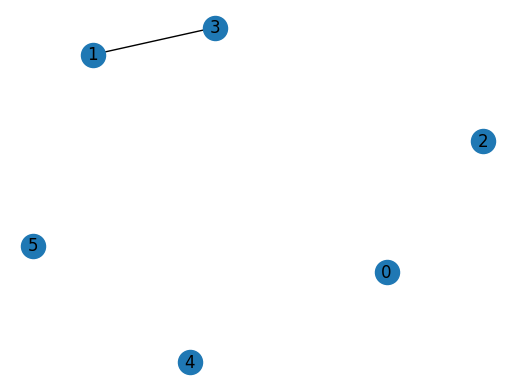

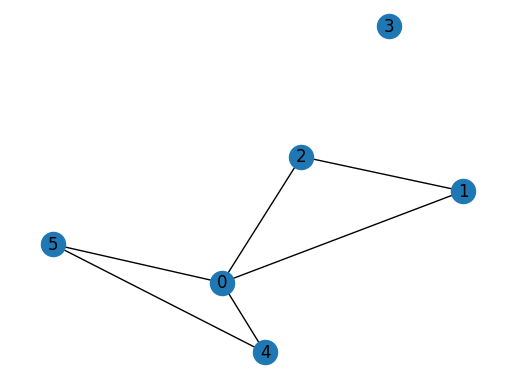

In [39]:
g1, g2 = draw_stats(stats)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

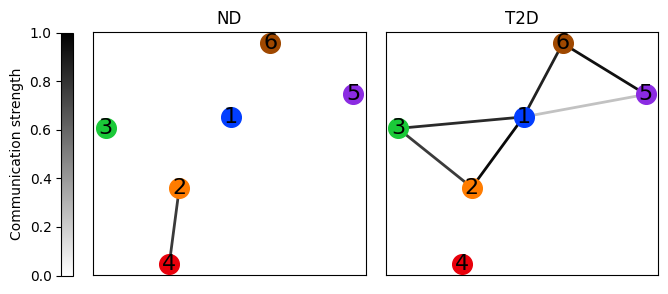

In [40]:
fig = plt.figure(figsize=(6, 3))

pal = sns.color_palette('bright',10)
dash = {True: '-', False: ':'}
g_comb = g1.copy()
for source,dest in g2.edges:
    g_comb.add_edge(source,dest)
pos=nx.drawing.nx_pydot.pydot_layout(g_comb,prog='neato')

ax = fig.add_subplot(121)
for k,v in pos.items():
    x,y = v
    ax.scatter([x], [y], c=pal[k], s=200, zorder=3)
    ax.text(x, y, k+1, fontsize=16, zorder=5, ha='center', va='center')

atrs = nx.get_edge_attributes(g1, 'weight')    
for e0,e1 in g1.edges():
    p = atrs[e0,e1]
    ax.plot([pos[e0][0], pos[e1][0]], [pos[e0][1],pos[e1][1]], c='black', alpha = 1-10*p, linewidth=2)

plt.xticks([])
plt.yticks([])
plt.title(groups[0])

bx = fig.add_subplot(122)
for k,v in pos.items():
    x,y = v
    bx.scatter([x], [y], c=pal[k], s=200, zorder=3)
    bx.text(x, y, k+1, fontsize=16, zorder=5, ha='center', va='center')
atrs = nx.get_edge_attributes(g2, 'weight')    
for e0,e1 in g2.edges():
    p = atrs[e0,e1]
    bx.plot([pos[e0][0],pos[e1][0]],[pos[e0][1],pos[e1][1]], c='black', alpha = 1-10*p, linewidth=2)

plt.xticks([])
plt.yticks([])
plt.title(groups[1])

ax2 = fig.add_axes([-0.02, 0.065, 0.02, 0.81])
cmap = mpl.cm.binary
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cbar = mpl.colorbar.ColorbarBase(ax=ax2, cmap=cmap, norm=norm, ticks=[0], orientation='vertical')
ax2.yaxis.set_ticks_position('left')
ax2.yaxis.set_label_position('left')
ax2.yaxis.set_ticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_ylabel('Communication strength')

plt.tight_layout()
plt.show()

fig.savefig('../analysis_res/T2D/CNE/net_vascular' + '.pdf', bbox_inches='tight')